import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix

In [3]:
pip install seaborn

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
PATH = 'C:/Users/manik/OneDrive/Desktop/datasets/cr.csv'
MODELS = './recommender-models/'
data = pd.read_csv(PATH)

## Data Analysis

In [5]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


This dataset consists of **2200** rows in total.

**Each row has 8 columns representing Nitrogen, Phosphorous, Potassium, Temperature, Humidity, PH, Rainfall and Label**

**NPK(Nitrogen, Phosphorous and Potassium)** values represent the NPK values in the soil.
**Temperature**, **humidity** and **rainfall** are the average values of the sorroundings environment respectively.
**PH** is the PH value present in the soil.
**Label** is the value of the type of crop which is suitable to be grown in the above given variable conditions. **Label is the value we will be predicting**


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
print(data.columns.tolist())

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


The different types of labels are given below

In [9]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Seperating features and output labels and creating training and test data 

In [11]:
features = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
labels = data['label']


In [12]:
# Splitting into the training and test dataset

# Train:Test = 4:1

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)



In [13]:
acc = []
models_list = []

### Logistic Regression

In [67]:
LogReg = LogisticRegression(random_state=42).fit(X_train, Y_train)

predicted_values = LogReg.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)
# print(predicted_values)
acc.append(accuracy)
models_list.append("Logistic Regression")
print(predicted_values[1:5])



1334    watermelon
1761        papaya
1735        papaya
1576         apple
Name: label, dtype: object


c:\Users\manik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\manik\AppData\Local\Temp\ipykernel_40424\2023319443.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(Y_test[1:5])


In [16]:
print("Logistic Regression accuracy: ", accuracy)

Logistic Regression accuracy:  0.9454545454545454


In [17]:
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    

In [18]:
filename = 'LogisticRegresion.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

### Decision Tree

In [15]:
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=1000).fit(X_train, Y_train)

predicted_values = DT.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)

acc.append(accuracy)
models_list.append("Decision Tree")

In [20]:
print("Decision Tree accuracy: ", accuracy)

Decision Tree accuracy:  0.9772727272727273


In [21]:
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.91      0.86        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.96      0.96      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [22]:
filename = 'DecisionTree.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

### Support Vector Machine SVM

In [23]:
SVM = SVC(gamma='auto').fit(X_train, Y_train)

predicted_values = SVM.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)

acc.append(accuracy)
models_list.append("Support Vector Machine (SVM)")

In [24]:
print("SVM accuracy: ", accuracy)

SVM accuracy:  0.09090909090909091


In [25]:
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      0.13      0.23        23
      banana       1.00      0.05      0.09        21
   blackgram       1.00      0.05      0.10        20
    chickpea       0.00      0.00      0.00        26
     coconut       1.00      0.07      0.14        27
      coffee       1.00      0.06      0.11        17
      cotton       1.00      0.18      0.30        17
      grapes       1.00      0.07      0.13        14
        jute       1.00      0.04      0.08        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.03      1.00      0.05        11
       maize       0.00      0.00      0.00        21
       mango       1.00      0.11      0.19        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      0.11      0.19        19
   muskmelon       1.00      0.59      0.74        17
      orange       0.00      0.00      0.00        14
      papaya       0.00    

c:\Users\manik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [26]:
filename = 'SVM.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

### Multi-Layer Perceptron

In [27]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1000, 600, 400, 200, 100, 50), random_state=1)

clf.fit(X_train, Y_train)

predicted_values = clf.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)
print(predicted_values)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'cotton' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'mothbeans' 'jute' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'blackgram' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'blackgram' 'watermelon' 'coconut' 'lentil'
 'orange' 'papaya' 'mothbeans' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'jute' 'banana' 'lentil' 'papaya' 'banana' 'cotton'
 'watermelon' 'orange' 'coffee' 'chickpea' 'rice' 'mothbeans' 'orange'
 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeonpeas' 'mothbeans' 'kidneybeans'
 'co

c:\Users\manik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [28]:
acc.append(accuracy)
models_list.append("Multi-Layer Perceptron")

In [29]:
print("SVM accuracy: ", accuracy)

SVM accuracy:  0.9568181818181818


In [30]:
print(metrics.classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.85      0.92        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.89      1.00      0.94        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.77      0.91      0.83        11
       maize       0.94      0.81      0.87        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.85      0.96      0.90        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.96    

In [31]:
filename = 'MLP.pkl'
pickle.dump(LogReg, open(MODELS + filename, 'wb'))

### Random Forest

In [14]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predicted_values)

acc.append(accuracy)
models_list.append('Random Forest')
print(Y_test)

1451     muskmelon
1334    watermelon
1761        papaya
1735        papaya
1576         apple
           ...    
59            rice
71            rice
1908        cotton
1958        cotton
482     pigeonpeas
Name: label, Length: 440, dtype: object


In [33]:
print("RF's Accuracy is: ", accuracy)

RF's Accuracy is:  0.9931818181818182


In [34]:
print(metrics.classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [17]:
filename = 'RF.pkl'
pickle.dump(RF, open(MODELS + filename, 'wb'))


<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

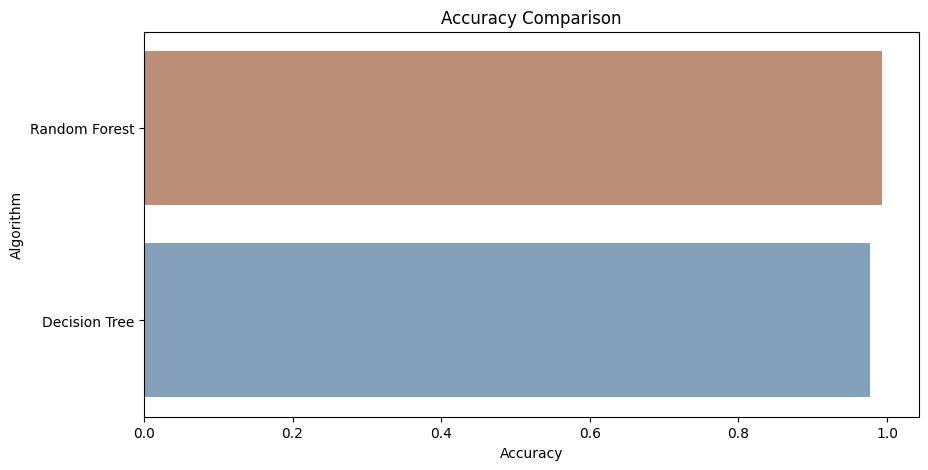

In [16]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = models_list,palette='twilight_shifted_r')

In [18]:
accuracy_models = dict(zip(models_list, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Random Forest --> 0.9931818181818182
Decision Tree --> 0.9772727272727273


In [19]:
print(confusion_matrix(Y_test, predicted_values))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0